# Classificação multiclasse roupas

### Bruno Oliveira

## 1. Objetivo
Demonstrar como realizar uma tarefa de classificação multiclasse usando uma RNA.
O banco de dados usado nesse exemplo é o Fashion-MNIST, que consiste de imagens de artigos de vestuário da Zalando. Esse banco de dados pode ser obtido no link https://github.com/zalandoresearch/fashion-mnist. Nesse problema queremos determinar o tipo de vestuário que é mostrado em uma imagem.

O problema consiste em dada uma imagem, a RNA avalia a probabilidade de existirem determinados tipos de
vestuário na imagem e determina qual o tipo mais provável entre dez possíveis.

O objetivo desse problema é treinar uma RNA que recebe como entrada uma imagem e determina qual tipo de
vestuário é mostrado na imagem.

## 2. Importação de bibliotecas

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

As saídas representam os tipos de vestuários (classes). As possíveis classes (rótulos) presentes nas imagens são as seguintes:

    0 – camiseta;
    1 – calça;
    2 – pulôver;
    3 – vestido;
    4 – casaco;
    5 – sandália;
    6 – camisa;
    7 – tênis.
    8 – bolsa;
    9 – bota de cano curto.


## 3. Carregar dados
O Keras possui esse banco de dados e para usá-lo basta importá-lo com um comando, como mostrado no
código a seguir.

Observa-se que o Keras possui diversos bancos de dados, cujos exemplos já estão em tensores, facilitando o
seu uso. No manual do TensorFlow é informado quais bancos de dados estão disponíveis e como fazer para utilizá-los (https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

O banco de dados Fashion MNIST possui 60.000 exemplos de treinamento e 10.000 exemplos de teste. Cada exemplo consiste de uma imagem em tons de cinza, de dimensão 28x28 pixels, associada a um rótulo de 10 classes. 

O banco de dados original da MNIST consiste de imagens de caracteres escritos a mão. As imagens de vestuário da Zelando tentam aprimorar o banco de dados original do MNIST.

Os dados de imagens da MNIST são muito utilizados na área de IA/ML como referência para validar sistemas de aprendizado de máquina. De fato os bancos de dados da MNIST são frequentemente os primeiros a serem testados com um novo sistema. Se não funcionar com esses dados, então, não vai funcionar com nada. Se funcionar com esses dados, pode ser que funcione ou não com outros dados.

In [10]:
# Importa bancos de dados do Keras
from tensorflow.keras.datasets import fashion_mnist

# Carrega dados da Fashion-MNIST em tenores
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

# Dimensões dos dados
print('Dimensão x_train:', x_train_orig.shape)
print('Dimensão x_test:', x_test_orig.shape)
print('Dimensão y_train:', y_train_orig.shape)
print('Dimensão y_test:', y_test_orig.shape)



Dimensão x_train: (60000, 28, 28)
Dimensão x_test: (10000, 28, 28)
Dimensão y_train: (60000,)
Dimensão y_test: (10000,)


Características das imagens de entrada:
         
         - As imagens de entrada são em tons de cinza;
         - Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total;
         - O valor da intensidade luminosa de cada pixel da imagem é um número inteiro entre 0 e 255;
         
As saídas representam os tipos de vestuários (classes). As possíveis classes (rótulos) presentes nas imagens
são as seguintes:

        0 – camiseta;
        1 – calça;
        2 – pulôver;
        3 – vestido;
        4 – casaco;
        5 – sandália;
        6 – camisa;
        7 – tênis.
        8 – bolsa;
        9 – bota de cano curto.

classe = 1


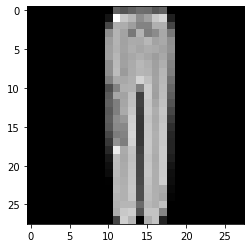

In [11]:
# Exemplo de uma imagem
index = 1000
plt.imshow(x_train_orig[index], cmap='gray')
print("classe = " + str(y_train_orig[index]))


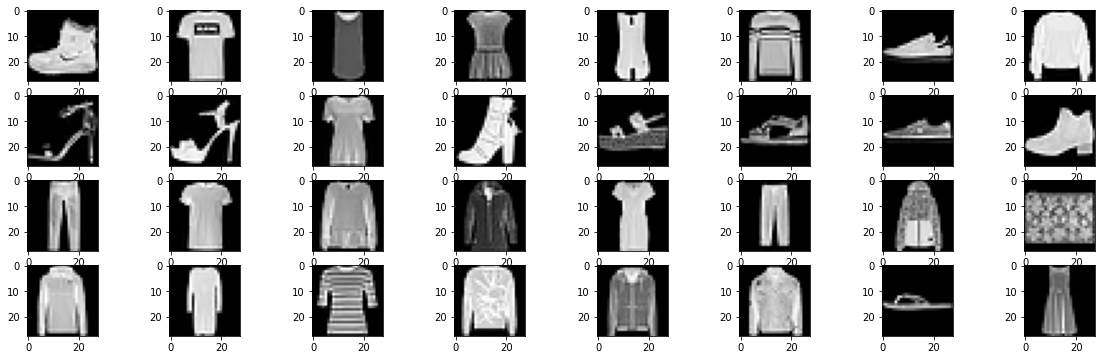

In [12]:
# Imagens de vários exemplos
fig, axs = plt.subplots(4, 8, figsize=(20, 6))
index = 0
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(x_train_orig[index], cmap='gray')
    index += 1

plt.show()


## 3. Pré-processamento dos dados
Primeiramente vamos dividir os dados do conjunto de treinamento em dados de treinamento e de validação.

Após isso, os dados dos exemplos de treinamento e de teste devem ser processados de forma a serem colocados em tensores com as dimensões adequadas e normalizados corretamente.

### Divisão do conjunto de treinamento

Para obter um conjunto de dados de validação vamos dividir o conjunto de treinamento de forma que 50.000
exemplos são usados como treinamento e 10.000 como validação.

In [13]:
# Numeros de exemplos
m_train = 50000
m_val = 10000

# Divisão dos dados
x_train = x_train_orig[:50000]
x_val = x_train_orig[50000:]
y_train = y_train_orig[:50000]
y_val = y_train_orig[50000:]

print ("Dimensão do tensor com as imagens de treinamento: ", x_train.shape)
print ("Dimensão do tensor com as imagens de validação: ", x_val.shape)
print ("Dimensão do tensor com as saídas de treinamento: ", y_train.shape)
print ("Dimensão do tensor com as saídas de validação: ", y_val.shape)

Dimensão do tensor com as imagens de treinamento:  (50000, 28, 28)
Dimensão do tensor com as imagens de validação:  (10000, 28, 28)
Dimensão do tensor com as saídas de treinamento:  (50000,)
Dimensão do tensor com as saídas de validação:  (10000,)


### Redimensionamento e normalização das imagens

Os dados de entrada de uma camada de neurônios densa é um vetor, assim, devemos redimensionar as
imagens, que tem dimensão (28, 28), para transformá-las em um vetor linha de dimensão (1, 28*28). Após esse redimensionamento o conjunto de dados é um tensor numpy onde cada linha representa uma imagem "esticada".
Além disso devemos transformar os valores dos pixels das imagens em números reais entre 0 e 1.

In [14]:
print(np.min(x_train_orig), np.max(x_train_orig)) #255 é o valor máximo de um pixel

0 255


In [15]:
# Número de exemplos
m_test = x_test_orig.shape[0]

# Redimensionamento e normalização das imagens
x_train = np.reshape(x_train, (m_train, 28*28))/255.
x_val = np.reshape(x_val, (m_val, 28*28))/255.
x_test = np.reshape(x_test_orig, (m_test, 28*28))/255.

print ("Dimensão do tensor com as imagens de treinamento: ", x_train.shape)
print ("Dimensão do tensor com as imagens de validação: ", x_val.shape)
print ("Dimensão do tensor com as imagens de teste: ", x_test.shape)




Dimensão do tensor com as imagens de treinamento:  (50000, 784)
Dimensão do tensor com as imagens de validação:  (10000, 784)
Dimensão do tensor com as imagens de teste:  (10000, 784)


### Criar lista de classes
Para poder analisar bem o desempenho da RNA é importante visualizar os seus resultados e para isso facilita
ter um lista com os nomes das classes.

Na célula abaixo é criada uma lista com os nomes das classes.

In [17]:
# Vetor de classe
class_names = ['camiseta', 'calça', 'pulôver', 'vestido', 'casaco', 'sandália',
               'camisa', 'tênis', 'bolsa', 'bota de cano curto']


### Codificação das saídas em vetores "one-hot"
Como visto as saídas de um problema de classificação multiclasse devem estar codificadas em vetores "one-hot".
Na célula baixo é realizada essa codificação.

In [18]:
# Importa função para codificação one-hot
from tensorflow.keras.utils import to_categorical

# Transforma saídas inteiras em vetores onde-hot
y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)
y_test_hot = to_categorical(y_test_orig)

# Mostra resultados
print('Dimensão do tensor de saídas de treinamento:', y_train_hot.shape)
print('Dimensão do tensor de saídas de validação:', y_val_hot.shape)
print('Dimensão do tensor de saídas de teste:', y_test_hot.shape)
print('Aguns exemplos de saídas: \n', y_train_hot[:5])


Dimensão do tensor de saídas de treinamento: (50000, 10)
Dimensão do tensor de saídas de validação: (10000, 10)
Dimensão do tensor de saídas de teste: (10000, 10)
Aguns exemplos de saídas: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 4. Configuração e compilação da RNA

Para resolver esse problema de classificação multiclasse vamos utilizar uma RNA com a seguinte configuração:


    - Número de camadas: 3;
    - Número de elementos no vetor de entrada: 784;
    - Número de neurônios da 1ª camada: 256;
    - Número de neurônios da 2ª camada: 64;
    - Função de ativação da 1ª e 2ª camadas: Relu;
    - Número de classes do problema: NC = 10;
    - Função de ativação da camada de saída: softmax.

Na célula abaixo é configurada a RNA.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


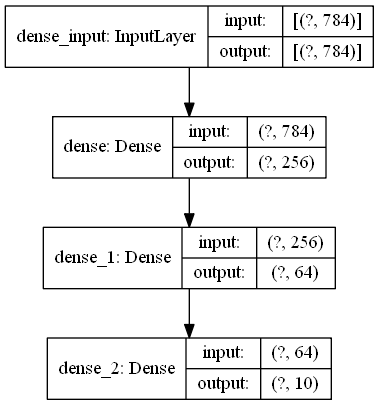

In [19]:
# Importa bibliotecas do TensorFlow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pydot

# Configuração da RNA
rna = models.Sequential()
rna.add(layers.Dense(256, activation='relu', input_shape=(784,)))
rna.add(layers.Dense(64,activation='relu'))
rna.add(layers.Dense(10, activation='softmax'))

# Mostra resuma da rede
rna.summary()

# Ilustra a representação esquemática do RNA
plot_model(rna, to_file='rna.png', show_shapes=True)

In [ ]:
Observa-se que essa RNA possui 218.058 parâmetros treináveis.

## 5. Compilação e Treinamento
Como visto, em um problema de classificação multiclasse a função de custo que deve ser utilizada é entropia
cruzada de múltiplas classes (“categorical_crossentropy”).

Como métrica para avaliar o desempenho do treinamento vamos utilizar a extidão ("accuracy"). Essa métrica é a mais utilizada nos problemas de classificação de múltiplas classes e representa a fração do número de classes classificadas de forma correta.

Para treinar essa RNA vamos utilizar o método de otimização RMSprop com taxa de aprendizado de 0.001.

O código da célula abaixo realiza a compilação da RNA com essa configuração.

In [20]:
# Importa classe dos otimizadores
from tensorflow.keras import optimizers

# Define otimizador RMSprop com taxa de aprendizado igual a 0.001
rms = optimizers.RMSprop(lr=0.001)

# Compilação da RNA
rna.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])


## 6. Treinamento e avaliação da RNA
Para treinar a RNA usaremos 20 épocas de treinamemto e lotes de 1024 elementos.

In [21]:
history = rna.fit(x_train, y_train_hot, epochs=20, batch_size=1024, validation_data=(x_val, y_val_hot))


Epoch 1/20
49/49 [==============================] - 1s 29ms/step - loss: 0.9155 - accuracy: 0.6856 - val_loss: 0.6800 - val_accuracy: 0.7449
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.5855 - accuracy: 0.7884 - val_loss: 0.5469 - val_accuracy: 0.7877
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.5069 - accuracy: 0.8162 - val_loss: 0.5286 - val_accuracy: 0.8005
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4572 - accuracy: 0.8335 - val_loss: 0.4826 - val_accuracy: 0.8311
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.4290 - accuracy: 0.8426 - val_loss: 0.4746 - val_accuracy: 0.8201
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3991 - accuracy: 0.8509 - val_loss: 0.4691 - val_accuracy: 0.8236
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.3818 - accuracy: 0.8592 - val_loss: 0.3750 - val_accuracy: 0.8646
Epoch 8/20
49

## 7. Visualização do resultado do treinamento
Para sabermos como o treinamento foi realizado precisamos visualizar a função de custo e a métrica ao longo
do processo de treinamento.

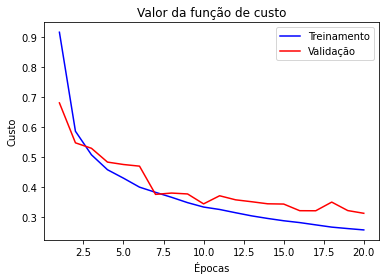

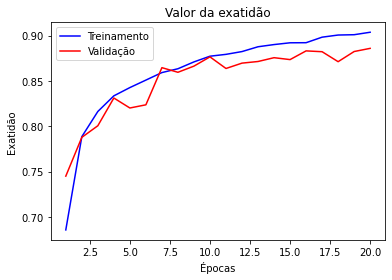

In [22]:
# Salva custo e exatidão em vetores
history_dict = history.history
custo = history_dict['loss']
exatidao = history_dict['accuracy']
custo_val = history_dict['val_loss']
exatidao_val = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico do custo em função das épocas
custo = history_dict['loss']
plt.plot(epocas, custo, 'b', label='Treinamento')
plt.plot(epocas, custo_val, 'r', label='Validação')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico da exatidão em função das épocas
plt.plot(epocas, exatidao, 'b', label='Treinamento')
plt.plot(epocas, exatidao_val, 'r', label='Validação')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.legend()
plt.show()


## 8. Avaliação do desempenho da rede
Após treinar a RNA é importante avaliar o seu desempenho com dados que não foram utilizados no treinamento.

In [23]:
# Calculo do custo e exatidão para os dados de treinamento, validação e teste
custo_e_metricas_train = rna.evaluate(x_train, y_train_hot)
custo_e_metricas_val = rna.evaluate(x_val, y_val_hot)
custo_e_metricas_test = rna.evaluate(x_test, y_test_hot)


313/313 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8800


## 9. Teste da Rede
Para avaliar melhor o desepenho da rede é importante calcular as saídas previstas dos exemplos do conjunto de
teste usando o método 'predict' .

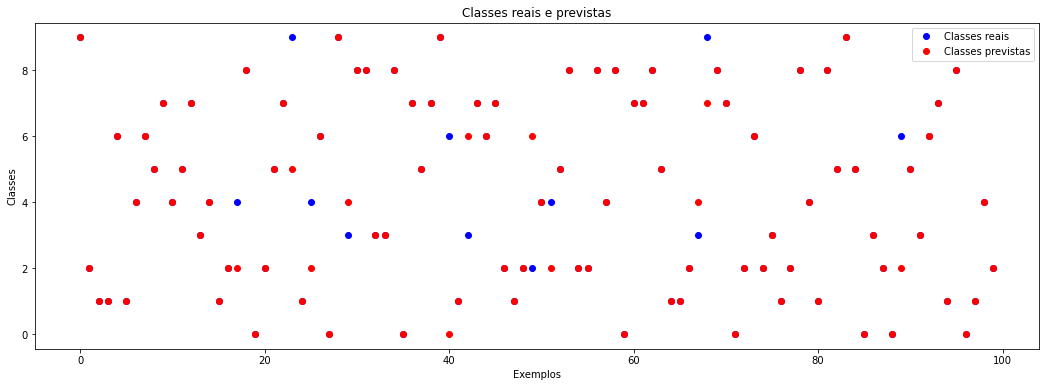

In [24]:
# Calcula das classes previstas
y_prev = rna.predict(x_test)

# Identifica classe prevista
classe_prev = np.argmax(y_prev, axis=1)

# Gráfico das classes reais e previstas para os primeiros 200 exemplos de teste
plt.figure(figsize=(18,6))
plt.plot(y_test_orig[:100], 'bo', label='Classes reais')
plt.plot(classe_prev[:100], 'ro', label="Classes previstas")
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()


Observe que cada círculo azul representa um exemplo classificado errado.

classe real = bota de cano curto / classe prevista = bota de cano curto
Probabilidades: [6.3126540e-06 5.4073394e-07 1.3602168e-04 3.2122261e-05 2.7162987e-05
 6.7135849e-04 1.0390497e-04 1.6282383e-02 2.1845096e-06 9.8273796e-01]


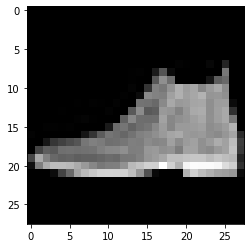

In [27]:
# Exemplo de classificação de uma imagem.
index = 0
plt.imshow(x_test_orig[index], cmap='gray')
print("classe real = " + str(class_names[y_test_orig[index]]) + 
      ' / ' "classe prevista = " + str(class_names[classe_prev[index]]))

print('Probabilidades:', y_prev[index])
